# Таничева Екатерина 2МЭО-1

# Экономический анализ датасета Home loan

$\underline{Содержание}$

 $\bigcirc $ $\textit{Описание данных}$

 $\bigcirc $ $\textit{Спецификация модели}$

$\bigcirc $ $\textit{Основные параметры регрессии, коэффициент детерминации и стандартная ошибка регрессии}$

 $\bigcirc $ $\textit{Интерпретация коэффициентов}$

 $\bigcirc $ $\textit{Визуализация данных}$

 $\bigcirc $ $\textit{Построение доверительных интервалов и определение значимых переменных}$

$\bigcirc $ $\textit{Оценка небинарной переменной}$

 $\bigcirc $ $\textit{Оценка регрессии на наличие мультиколлинеарности}$

 $\bigcirc $ $\textit{Аналих модели на наличие гетероскедастичности}$

$\bigcirc $ $\textit{Анализ модели на автокорреляцию ( с помощью теста Дарбина-Уотсона)}$

In [89]:
import pandas as pd
import numpy as np
import statsmodels.api as sm 
import statsmodels.formula.api as smf
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
import re
import io
import scipy.stats as stats
from statsmodels.iolib.summary2 import summary_params # вывод результатов тестирования
from statsmodels.iolib.summary2 import summary_col # вывод результатов тестирования
from statsmodels.stats.outliers_influence import variance_inflation_factor # VIF
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.compat import lzip

# Описание данных

In [120]:
df = pd.read_csv('https://raw.githubusercontent.com/EMR-Python/emr-hw-e-tanicheva/main/%D0%90%D0%BD%D0%B0%D0%BB%D0%B8%D0%B7/home_loan.csv?token=GHSAT0AAAAAACAJVQ2ZJPB7XUZPZTD6EEVSZC2JEQQ')
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,NaN,Semiurban
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural


## Данный датасет содержит данные о клиентах, получивших ипотечный кредит в компании Dream Housing Finance.  Он состоит из следующих показателей:

##### 1. $\textit{Loan_ID}$ - данные, используемые для идентификации конкретного кредита

##### 2. $\textit{Gender}$ - пол клиента

##### 3. $\textit{Married}$ - семейный статус (женат/замужем)

##### 4. $\textit{Dependents}$ - количество иждивенцев

##### 5. $\textit{Education}$ - образование (получено/не окончено)

##### 6. $\textit{Self_Employed}$ - самозанятый (да/нет)

##### 7. $\textit{ApplicantIncome}$ - доход заявителя

##### 8. $\textit{CoapplicantIncome}$ - доход созаемщика


##### 9. $\textit{LoanAmount}$ - сумма кредита

##### 10. $\textit{Loan_Amount_Term}$ - срок займа

##### 11. $\textit{Credit_History}$ - кредитная история (1-если был кредит, 0-если нет)

##### 12. $\textit{Property_Area}$ - территория собственности

In [121]:
statistics = df.describe()
print(statistics)

       ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
count       367.000000         367.000000  362.000000        361.000000   
mean       4805.599455        1569.577657  136.132597        342.537396   
std        4910.685399        2334.232099   61.366652         65.156643   
min           0.000000           0.000000   28.000000          6.000000   
25%        2864.000000           0.000000  100.250000        360.000000   
50%        3786.000000        1025.000000  125.000000        360.000000   
75%        5060.000000        2430.500000  158.000000        360.000000   
max       72529.000000       24000.000000  550.000000        480.000000   

       Credit_History  
count      338.000000  
mean         0.825444  
std          0.380150  
min          0.000000  
25%          1.000000  
50%          1.000000  
75%          1.000000  
max          1.000000  


In [122]:
Gender_stats = df['Gender'].value_counts()
print(Gender_stats)

Male      286
Female     70
Name: Gender, dtype: int64


In [123]:
Married_stats = df['Married'].value_counts()
print(Married_stats)

Yes    233
No     134
Name: Married, dtype: int64


In [124]:
Dependents_stats = df['Dependents'].value_counts()
print(Dependents_stats)

0     200
2      59
1      58
3+     40
Name: Dependents, dtype: int64


In [125]:
Education_stats = df['Education'].value_counts()
print(Education_stats)

Graduate        283
Not Graduate     84
Name: Education, dtype: int64


In [126]:
Self_Employed_stats = df['Self_Employed'].value_counts()
print(Self_Employed_stats)

No     307
Yes     37
Name: Self_Employed, dtype: int64


In [127]:
Property_Area_stats = df['Property_Area'].value_counts()
print(Property_Area_stats)

Urban        140
Semiurban    116
Rural        111
Name: Property_Area, dtype: int64


### Исходя из полученных данных, можно сделать следующие выводы

#### Пол:

$\triangleright$  $\textit{В выборке присутствует гендерный дисбаланс, количество мужчин (286), взявших кредит, превышает количество женщин(70)};$

$\triangleright$  $\textit{Вывод: мужчины более склонны к тому, чтобы взять ипотечный кредит};$

#### Семейное положение:

$\triangleright$  $\textit{Большинство клиентов являются замужними/женатыми (233 из 367)};$

$\triangleright$  $\textit{Вывод:замужние/женатые люди вероятнее всего возьмт ипотечный кредит на жилье};$

#### Наличие  иждивенцев:

$\triangleright$ $\textit{У большинства клиентов(200) отсутствуют иждивенцы (несовершеннолетние дети, родители/супруги нетрудоспособного возвраста) или же присутствует 1,2 (59,58)};$

$\triangleright$  $\textit{Вывод: люди, необремененные содержанием иждивенцев, чаще берут ипотечный кредит};$

#### Образование:

$\triangleright$  $\textit{Большинство клиентов, взявших ипотеку - образованные люди(283 к 84)};$

#### Самозанятость:

$\triangleright$  $\textit{Большинство клиентов имеют стабильную работу и не являются самозанятыми(307 из 367)};$

#### Доход заявителя:

$\triangleright$  $\textit{Средний доход заявителя составляет примерно 4805.6, при этом значение медианы - 3786.0};$

$\triangleright$  $\textit{Максимальное значение дохода заявителя составляет 72529.0};$

$\triangleright$  $\textit{Стандартное отклонение составляет 4910.6};$

#### Сумма кредита:

$\triangleright$  $\textit{Средняя сумма кредита составляет примерно  136.13};$

$\triangleright$  $\textit{При этом минимальное значение составляет 18, а максимальное 550};$

$\triangleright$  $\textit{Стандартное отклонение составляет 61.37};$

#### Территория собственности:

$\triangleright$  $\textit{Составляя рейтинг территорий, на которой приобретается собственность: 1) Город(140); 2)Полугородской(116); 3) Сельская местность(111) };$

# Спецификация модели

$\textit{Проанализируем влияние дохода заявителя, семейного положения, образования, а также территории собственности на сумму ипотечного кредита:}$

$ LoanAmount = \beta_0 + \beta_1*ApplicantIncome + \beta_2*Married + \beta_3*Education +\beta_4*PropertyArea $

In [128]:
model = smf.ols('LoanAmount ~ ApplicantIncome + C(Married) + C(Education) + Property_Area',data = df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             LoanAmount   R-squared:                       0.279
Model:                            OLS   Adj. R-squared:                  0.269
Method:                 Least Squares   F-statistic:                     27.59
Date:                Tue, 09 May 2023   Prob (F-statistic):           1.30e-23
Time:                        16:26:37   Log-Likelihood:                -1944.2
No. Observations:                 362   AIC:                             3900.
Df Residuals:                     356   BIC:                             3924.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                      101.4735      6.829     14.860      0.000      88.044     114.903
C(Married)[T.Yes]               20.8921      5.730      3.646      0.000       9.623      32.162
C(Education)[T.Not Graduate]   -13.9895      6.647     -2.105      0.036     -27.062      -0.917
Property_Area[T.Semiurban]      -4.7801      7.019     -0.681      0.496     -18.584       9.024
Property_Area[T.Urban]          -5.2293      6.711     -0.779      0.436     -18.428       7.970
ApplicantIncome                  0.0059      0.001     10.386      0.000       0.005       0.007
==============================================================================
Omnibus:                      107.090   Durbin-Watson:                   1.841
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              463.863
Skew:                           1.207   Prob(JB):                    1.88e-101
Kurtosis:                       7.993   Cond. No.                     2.47e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.47e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [129]:
loan_eq = smf.ols(formula='LoanAmount ~ ApplicantIncome + C(Married) + C(Education) + Property_Area', data=df).fit()
loan_eq.params

Intercept                       101.473488
C(Married)[T.Yes]                20.892101
C(Education)[T.Not Graduate]    -13.989519
Property_Area[T.Semiurban]       -4.780110
Property_Area[T.Urban]           -5.229287
ApplicantIncome                   0.005914
dtype: float64

# Основные параметры регрессии, коэффициент детерминации и стандартная ошибка регрессии

In [130]:
# TSS - общий расброс данных
loan_eq.centered_tss.round(3)

1359477.635

In [131]:
# ESS - часть разброса, объясняемая моделью (какое количество дисперсии объясняет модель)
loan_eq.ess.round(3)

379703.044

In [132]:
# RSS -  часть разброса нельзя объяснить моделью (какое количество дисперсии остается после рассмотрения модели)
RSS=loan_eq.ssr.round(3)
RSS

979774.592

In [133]:
# R^2 - какая доля дисперсии целевой переменной объяснена моделью
loan_eq.rsquared.round(3)

0.279

In [134]:
n=367
k=4
s=np.sqrt(RSS/(n-k-1))
round(s,3)

52.025

# Интерпретация коэффициентов

## Семейное положение

- $\textit{Женатые/замужние люди берут ипотечный кредит стоимостью на 20.9 выше, чем неженатые/незамужние}$;

- $\textit{Значение коэффициента статистически значимо, т.к. p_value = 0.000, что подтверждает значительное влияние семейного положения на сумму кредита при учете  других переменных в модели}$

## Образование

- $\textit{Люди с неоконченным высшим образованием берут ипотечные кредиты с суммой меньше на 13.99, чем люди с высшим образованием}$;

- $\textit{Значение коэффициента статистически значимо, т.к. p_value = 0.036, что подтверждает значительное влияние образования на сумму кредита при учете  других переменных в модели}$

## Территория собственности

- $\textit{Если собственность для которой берется ипотечный кредит находится в сельской местности, то сумма кредита уменьшается на 4.78};$

- $\textit{Значение коэффициента статистически значимо, т.к. p_value = 0.496, что подтверждает значительное влияние местоположения собственности в сельской местностина сумму кредита при учете  других переменных в модели}$

- $\textit{Если собственность для которой берется ипотечный кредит находится в городе, то сумма кредита уменьшается на 5.23};$

- $\textit{Значение коэффициента статистически значимо, т.к. p_value = 0.436, что подтверждает значительное влияние местоположения собственности в городской местности на сумму кредита при учете  других переменных в модели}$

## Доход заявителя

- $\textit{При увеличении дохода заявителя на 0.0059, сумма кредита также увеличивается на 0.0059};$

- $\textit{Значение коэффициента статистически значимо, т.к. p_value = 0.000, что подтверждает значительное влияние дохода заявителя на сумму кредита при учете  других переменных в модели}$

# Визуализация данных

## Зависимость регрессоров от различных переменных

In [135]:
sns.pairplot(df[['ApplicantIncome','Married','Education','Property_Area']], hue='Married')

In [136]:
sns.pairplot(df[['ApplicantIncome','Married','Education','Property_Area']], hue='Education')

In [137]:
sns.pairplot(df[['ApplicantIncome','Married','Education','Property_Area']], hue='Property_Area')

## График матрицы рассеяния

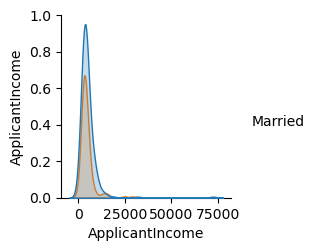

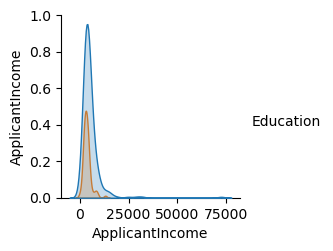

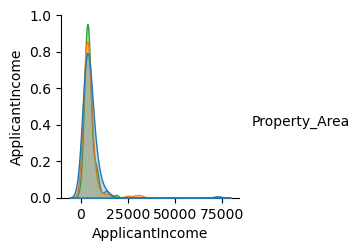

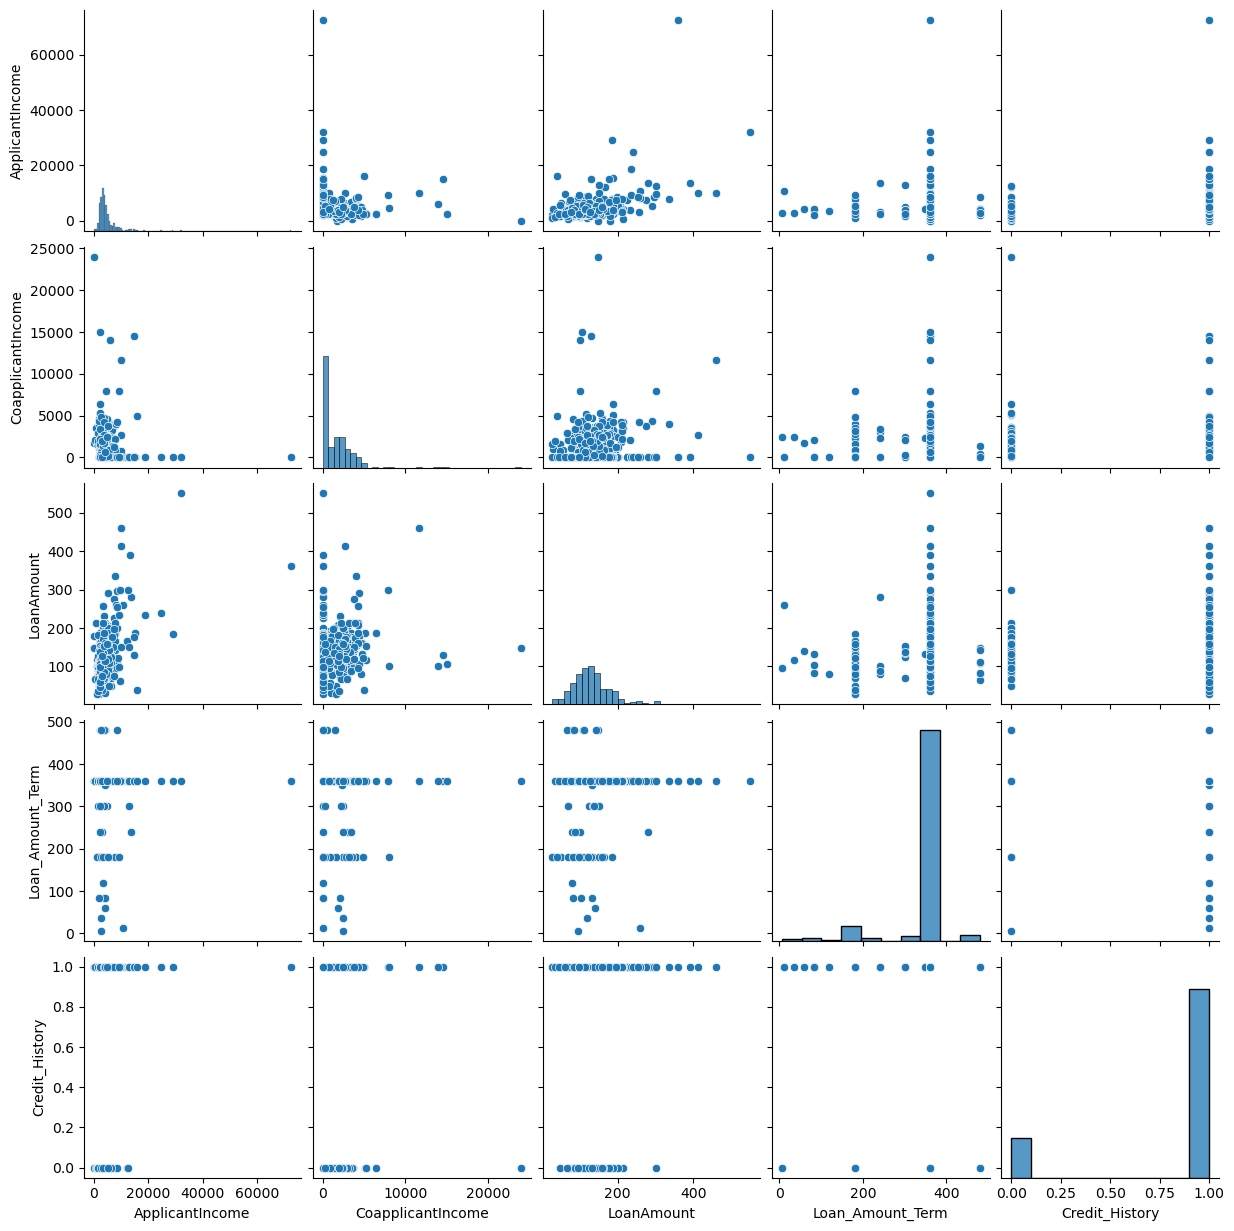

In [138]:
sns.pairplot(df)
plt.show()

## График матрицы рассеяния позволяет визуально исследовать связи между всеми переменными в датасете. На главной диагонали матрицы располагаются гистограммы для каждой переменной, показывающие ее распределение. В остальных ячейках матрицы располагаются графики рассеяния для пар переменных, где ось X соответствует одной переменной, а ось Y - другой переменной.

# Построение доверительных интервалов и определение значимых переменных

In [139]:
model = smf.ols('LoanAmount ~ ApplicantIncome + C(Married) + C(Education) + Property_Area',data = df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             LoanAmount   R-squared:                       0.279
Model:                            OLS   Adj. R-squared:                  0.269
Method:                 Least Squares   F-statistic:                     27.59
Date:                Tue, 09 May 2023   Prob (F-statistic):           1.30e-23
Time:                        16:27:09   Log-Likelihood:                -1944.2
No. Observations:                 362   AIC:                             3900.
Df Residuals:                     356   BIC:                             3924.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                      101.4735      6.829     14.860      0.000      88.044     114.903
C(Married)[T.Yes]               20.8921      5.730      3.646      0.000       9.623      32.162
C(Education)[T.Not Graduate]   -13.9895      6.647     -2.105      0.036     -27.062      -0.917
Property_Area[T.Semiurban]      -4.7801      7.019     -0.681      0.496     -18.584       9.024
Property_Area[T.Urban]          -5.2293      6.711     -0.779      0.436     -18.428       7.970
ApplicantIncome                  0.0059      0.001     10.386      0.000       0.005       0.007
==============================================================================
Omnibus:                      107.090   Durbin-Watson:                   1.841
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              463.863
Skew:                           1.207   Prob(JB):                    1.88e-101
Kurtosis:                       7.993   Cond. No.                     2.47e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.47e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [140]:
data_string='''	Names Estimate	std.error	
Intercept	101.4735	6.829
C(Married)[T.Yes]	20.8921	5.730	
C(Education)[T.Not_Graduate]	-13.9895	6.647	
Property_Area[T.Semiurban]	-4.7801	7.019	
Property_Area[T.Urban]	-5.2293	6.711	
ApplicantIncome	0.0059	0.001'''

In [141]:
df=pd.read_csv(io.StringIO(data_string),sep='\s+')
df

,Names,Estimate,std.error
0,Intercept,101.4735,6.829
1,C(Married)[T.Yes],20.8921,5.730
2,C(Education)[T.Not_Graduate],-13.9895,6.647
3,Property_Area[T.Semiurban],-4.7801,7.019
4,Property_Area[T.Urban],-5.2293,6.711
5,ApplicantIncome,0.0059,0.001


In [142]:
alpha= 0.05
t_cr = stats.t.ppf(1-alpha/2, 367-6)
t_cr.round(2)

1.97

In [143]:
df['left'] = df['Estimate'] - t_cr*df['std.error']
df['right'] = df['Estimate'] + t_cr*df['std.error']
df

,Names,Estimate,std.error,left,right
0,Intercept,101.4735,6.829,88.043882,114.903118
1,C(Married)[T.Yes],20.8921,5.730,9.623728,32.160472
2,C(Education)[T.Not_Graduate],-13.9895,6.647,-27.061205,-0.917795
3,Property_Area[T.Semiurban],-4.7801,7.019,-18.583364,9.023164
4,Property_Area[T.Urban],-5.2293,6.711,-18.426865,7.968265
5,ApplicantIncome,0.0059,0.001,0.003933,0.007867


In [144]:
df['t_nabluedaemoe'] = df['Estimate']/df['std.error']
df

,Names,Estimate,std.error,left,right,t_nabluedaemoe
0,Intercept,101.4735,6.829,88.043882,114.903118,14.859203
1,C(Married)[T.Yes],20.8921,5.730,9.623728,32.160472,3.646091
2,C(Education)[T.Not_Graduate],-13.9895,6.647,-27.061205,-0.917795,-2.104634
3,Property_Area[T.Semiurban],-4.7801,7.019,-18.583364,9.023164,-0.681023
4,Property_Area[T.Urban],-5.2293,6.711,-18.426865,7.968265,-0.779213
5,ApplicantIncome,0.0059,0.001,0.003933,0.007867,5.900000


In [145]:
df['Znachimosty'] = df.apply(lambda x: 'znachim' if np.abs(x['t_nabluedaemoe']) >t_cr else 'ne znachim', axis = 1)
df

,Names,Estimate,std.error,left,right,t_nabluedaemoe,Znachimosty
0,Intercept,101.4735,6.829,88.043882,114.903118,14.859203,znachim
1,C(Married)[T.Yes],20.8921,5.730,9.623728,32.160472,3.646091,znachim
2,C(Education)[T.Not_Graduate],-13.9895,6.647,-27.061205,-0.917795,-2.104634,znachim
3,Property_Area[T.Semiurban],-4.7801,7.019,-18.583364,9.023164,-0.681023,ne znachim
4,Property_Area[T.Urban],-5.2293,6.711,-18.426865,7.968265,-0.779213,ne znachim
5,ApplicantIncome,0.0059,0.001,0.003933,0.007867,5.900000,znachim


## Значимыми являются переменные Intercept, Married, Education и ApplicantIncome

# Оценка небинарной переменной

In [148]:
df = pd.read_csv('https://raw.githubusercontent.com/EMR-Python/emr-hw-e-tanicheva/main/%D0%90%D0%BD%D0%B0%D0%BB%D0%B8%D0%B7/home_loan.csv?token=GHSAT0AAAAAACAJVQ2YK2FBCTLZD26Y4NXUZC2JKCQ')
# Метод .loc[] фильтрует данные таблицы по строкам и столбцам.
# Метод  "df.loc[:,['carat']]" делает срез данных и означает,
# что из датафрейма выбираются все строки(это делается с помощью знака ":") столбца "carat".
df_all = pd.get_dummies(df.loc[:,['ApplicantIncome','Married','Education','Property_Area','LoanAmount']])
df_all

,ApplicantIncome,LoanAmount,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,5720,110.0,0,1,1,0,0,0,1
1,3076,126.0,0,1,1,0,0,0,1
2,5000,208.0,0,1,1,0,0,0,1
3,2340,100.0,0,1,1,0,0,0,1
4,3276,78.0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...
362,4009,113.0,0,1,0,1,0,0,1
363,4158,115.0,0,1,1,0,0,0,1
364,3250,126.0,1,0,1,0,0,1,0
365,5000,158.0,0,1,1,0,1,0,0


In [153]:
model_d = smf.ols(formula='LoanAmount ~ ApplicantIncome +Married_No + Married_Yes + Education_Graduate + Property_Area_Rural + Property_Area_Semiurban + Property_Area_Urban ',data=df_all).fit()
model_d.params

Intercept                  51.596484
ApplicantIncome             0.005914
Married_No                 15.352192
Married_Yes                36.244293
Education_Graduate         13.989519
Property_Area_Rural        20.535294
Property_Area_Semiurban    15.755184
Property_Area_Urban        15.306007
dtype: float64

### Гипотеза

$H_0: \beta_{Property Area Rural} = \beta_{Property Area Semiurban} = \beta_{Property Area Urban} = 0$

$H_1: \beta_{Property Area Rural}^2 + \beta_{Property Area Semiurban}^2 + \beta_{Property Area Urban}^2 > 0$

In [154]:
model_d.f_test('Property_Area_Rural = Property_Area_Semiurban = Property_Area_Urban =0')

<class 'statsmodels.stats.contrast.ContrastResults'>
<F test: F=78.90665737811945, p=3.732172864524065e-39, df_denom=356, df_num=3>

In [155]:
stats.f.ppf(1-0.05,3,len(df_all)-3).round(2)

2.63

$F_{obs} > F_{cr}$  $\textit{следовательно, категориальная переменная территории собственности является значимой}$

# Оценка регрессии на наличие мультиколлинеарности

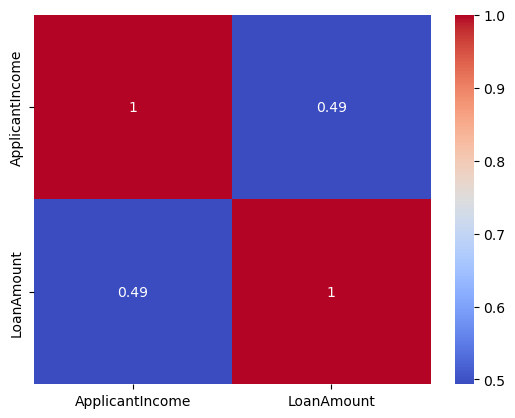

In [79]:
columns = ['ApplicantIncome','Married','Education','Property_Area', 'LoanAmount']
subset = df[columns]
corr_matrix = subset.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

# Анализ модели на наличие гетероскедастичности

$H_0: \gamma_1 = \gamma_2 = \gamma_3 = \gamma_4 = 0$ 

$H_1: \gamma_1^2 + \gamma_2^2 + \gamma_3^2 + \gamma_4^2 > 0$ 

In [81]:
df = pd.read_csv('https://raw.githubusercontent.com/EMR-Python/emr-hw-e-tanicheva/main/%D0%90%D0%BD%D0%B0%D0%BB%D0%B8%D0%B7/home_loan.csv?token=GHSAT0AAAAAACAJVQ2Y26SFLCZOPTDWSISGZCZMQZQ')
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,NaN,Semiurban
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural


In [82]:
df['res2']=model.resid**2
df['res']=model.resid
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,res2,res
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban,1678.081415,-40.964392
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban,87.007322,-9.327772
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban,3756.916334,61.293689
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban,959.454733,-30.975066
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban,558.327377,-23.628952
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban,191.989194,-13.856017
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban,714.317636,-26.726721
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,NaN,Semiurban,101.729747,10.086117
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural,36.776973,6.064402


In [83]:
model = smf.ols('LoanAmount ~ ApplicantIncome + C(Married) + C(Education) + Property_Area',data = df).fit()

In [84]:
submodel = smf.ols('res2 ~ ApplicantIncome + C(Married) + C(Education) + Property_Area',data = df).fit()

In [85]:
St = np.round(len(df)*submodel.rsquared,2)
St

78.24

$F_{nabl} = 78.24$

In [86]:
Hi2 = stats.chi2.ppf(1-0.05,4)
Hi2.round(2)

9.49

$F_{crit} = 9.49$

$F_{nabl} > F_{crit}$, $\textit{есть основания отвергнуть гипотезу, тест свидетельствует о гетероскедастичности}$

# Анализ модели на автокорреляцию ( с помощью  теста Дарбина-Уотсона)

In [87]:
from statsmodels.stats.stattools import durbin_watson
dw = durbin_watson(model.resid)
round(dw,2)

1.84

$\textit{Значение теста Дарбина-Уотсона свидетельствует о том, автокорреляция в остатках слабая (т.к. принимает знаечение меньше 2),соответственно, остатки независимы друг от друга}$